### **Visual story telling part 2: Capital Metro data**

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
# Read the file
CapMetro = pd.read_csv('capmetro_UT.csv')
CapMetro.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


We want to know how boardings and alightings behave in time

In [188]:
# Convert the timestamp to datetime format
CapMetro['timestamp'] = pd.to_datetime(CapMetro['timestamp'])

# Set the timestamp column as the CapMetro dataframe index
CapMetro.set_index('timestamp', inplace=True)

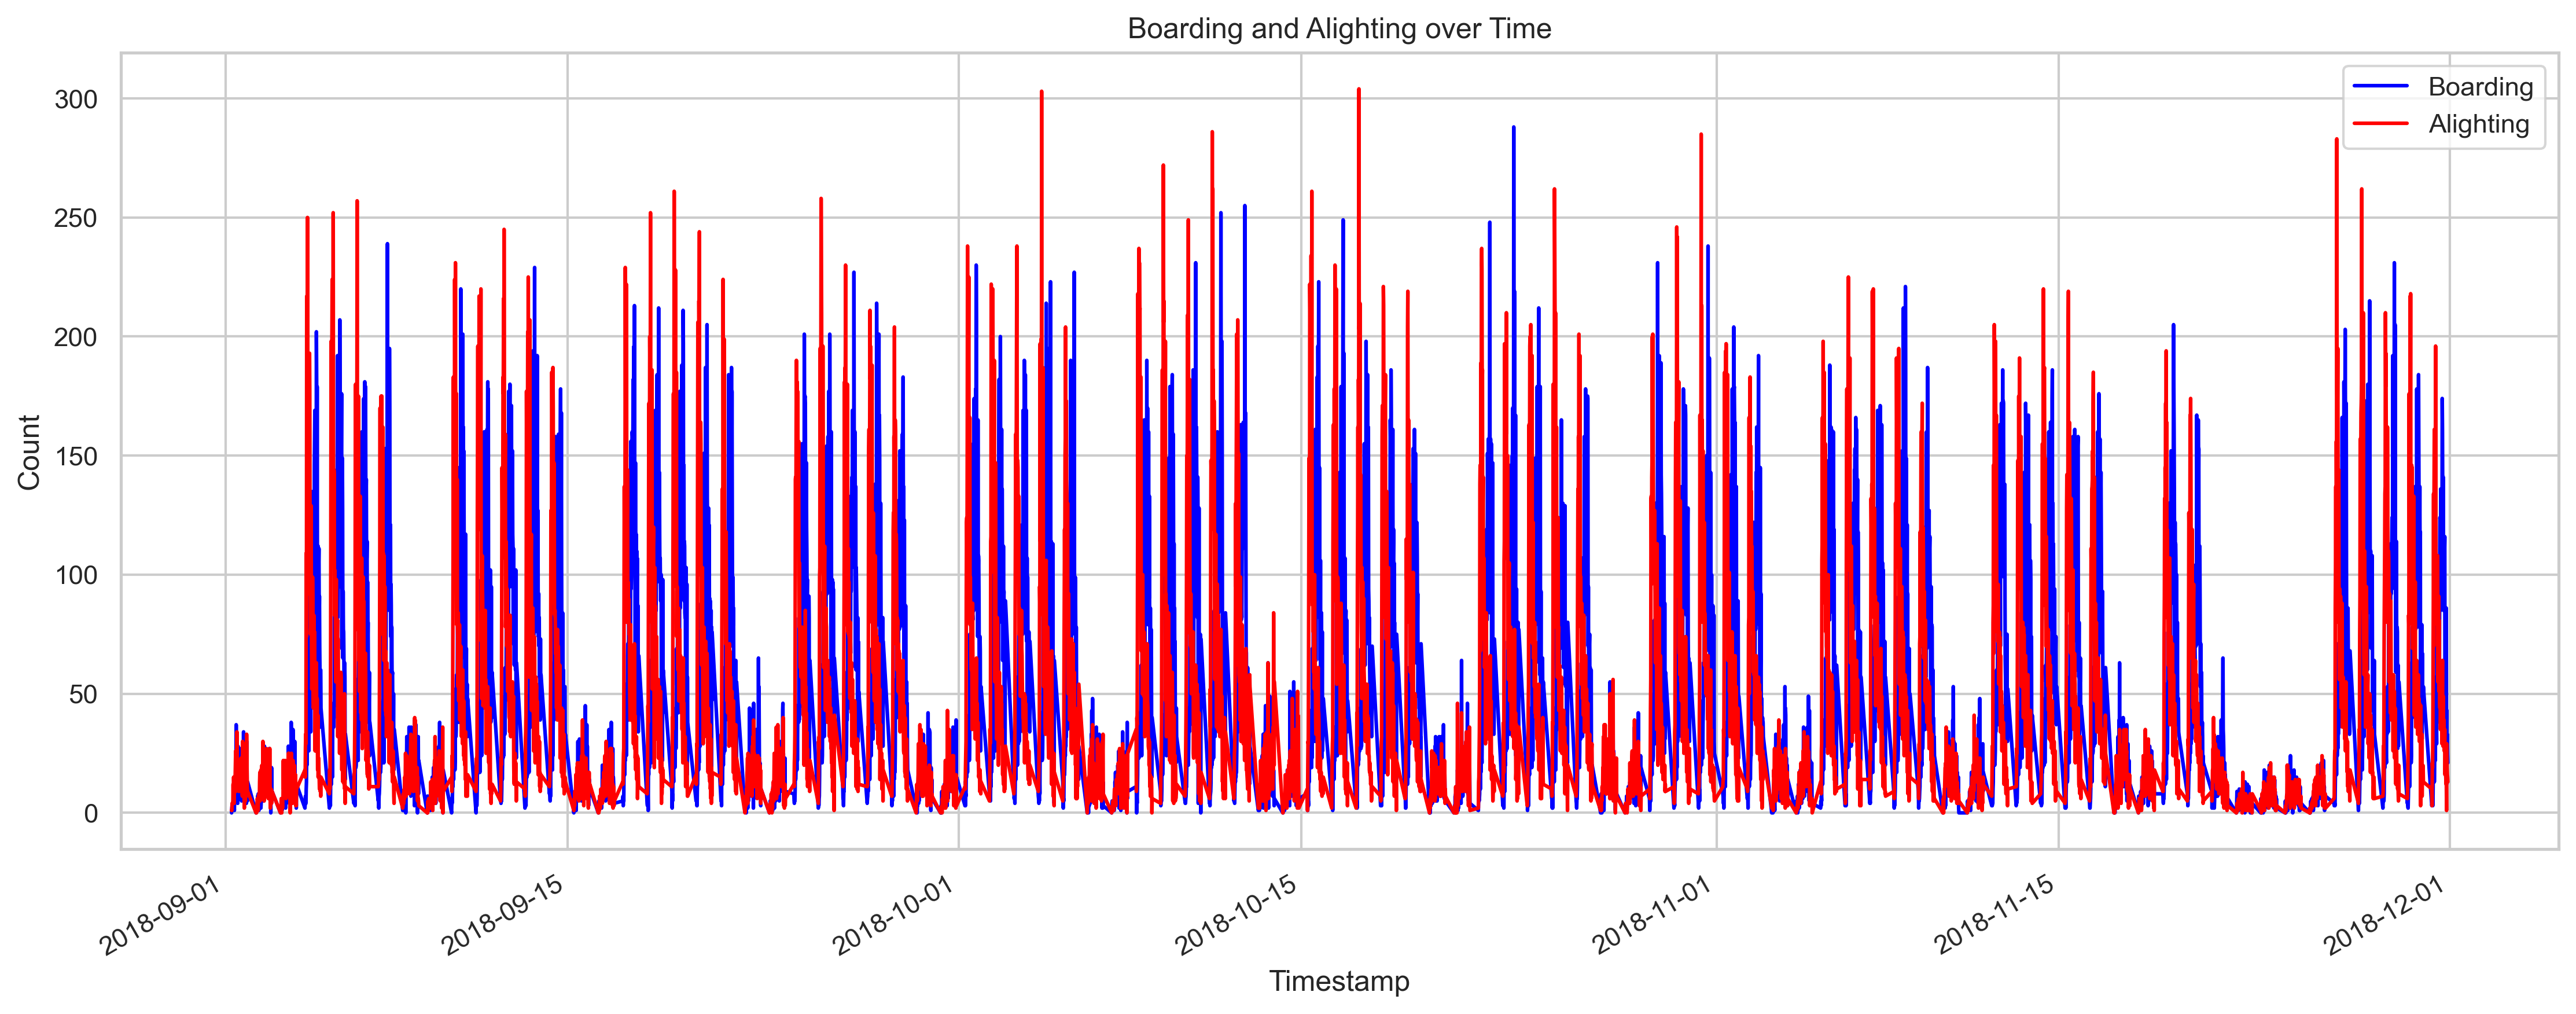

In [189]:
plt.figure(figsize=(15, 6))
CapMetro['boarding'].plot(label='Boarding', color='blue')
CapMetro['alighting'].plot(label='Alighting', color='red')
plt.title('Boarding and Alighting over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Thers is obviously some "seasonality" in the data, as we should anticipate. Therefore, we can look at the data grouped by day of the week (averaging data for each day, Monday to Sunday)

In [190]:
# We group the data by 'day_of_week', and we want to know the averages for 'boarding' and 'alighting'
CapMetro_week = CapMetro.groupby('day_of_week').agg({'boarding': 'mean', 'alighting': 'mean'})

# We want days to be ordered from Monday to Sunday, we do that by reindexing
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
CapMetro_week = CapMetro_week.reindex(days_order)



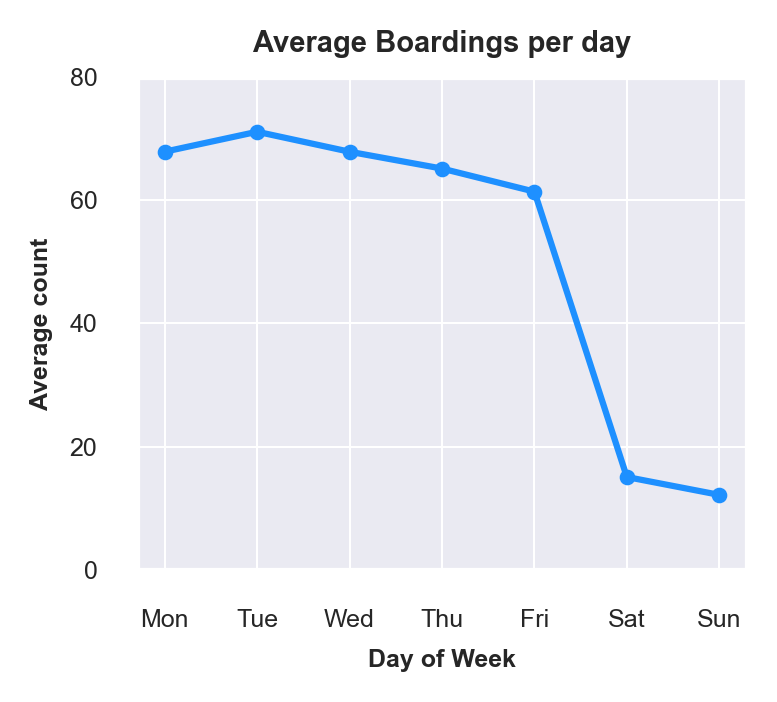

In [191]:
# Set Seaborn style
sns.set_style("darkgrid")

# Initialize the figure
plt.figure(figsize=(2.75, 2.5), dpi=300)  # Reducing figsize to balance out the dpi increase

# Plot line
sns.lineplot(data=CapMetro_week, x=CapMetro_week.index, y='boarding', color='dodgerblue', marker='o', markersize=3, markeredgecolor=None)

# Title, labels
plt.title('Average Boardings per day', fontsize=7, fontweight='bold')
plt.xlabel('Day of Week', fontsize=6, fontweight='bold')
plt.ylabel('Average count', fontsize=6, fontweight='bold')

# Adjustments
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid(linewidth=0.5)
plt.ylim(bottom=0, top=80)

plt.tight_layout()
plt.show()

The plot shows that CapMetro is most active during weekdays (probably because of all the commuting), and during weekends it transports less than a third of what it does on weekdays.

In [194]:
# Using qcut to create quintiles and bin edges
CapMetro['temperature_quintile'], bin_edges = pd.qcut(CapMetro['temperature'], q=5, precision=2, retbins=True)

# Create custom labels
temp_labels = [
    f"Very Low ({bin_edges[0]:.2f} - {bin_edges[1]:.2f})",
    f"Low ({bin_edges[1]:.2f} - {bin_edges[2]:.2f})",
    f"Medium ({bin_edges[2]:.2f} - {bin_edges[3]:.2f})",
    f"High ({bin_edges[3]:.2f} - {bin_edges[4]:.2f})",
    f"Very High ({bin_edges[4]:.2f} - {bin_edges[5]:.2f})"]

# Assigning the custom labels
CapMetro['temp_labels'] = pd.cut(CapMetro['temperature'], bins=bin_edges, labels=temp_labels, include_lowest=True)

# Grouping by the custom labels
avg_boardings_by_temp_labels = CapMetro.groupby('temp_labels')['boarding'].mean()


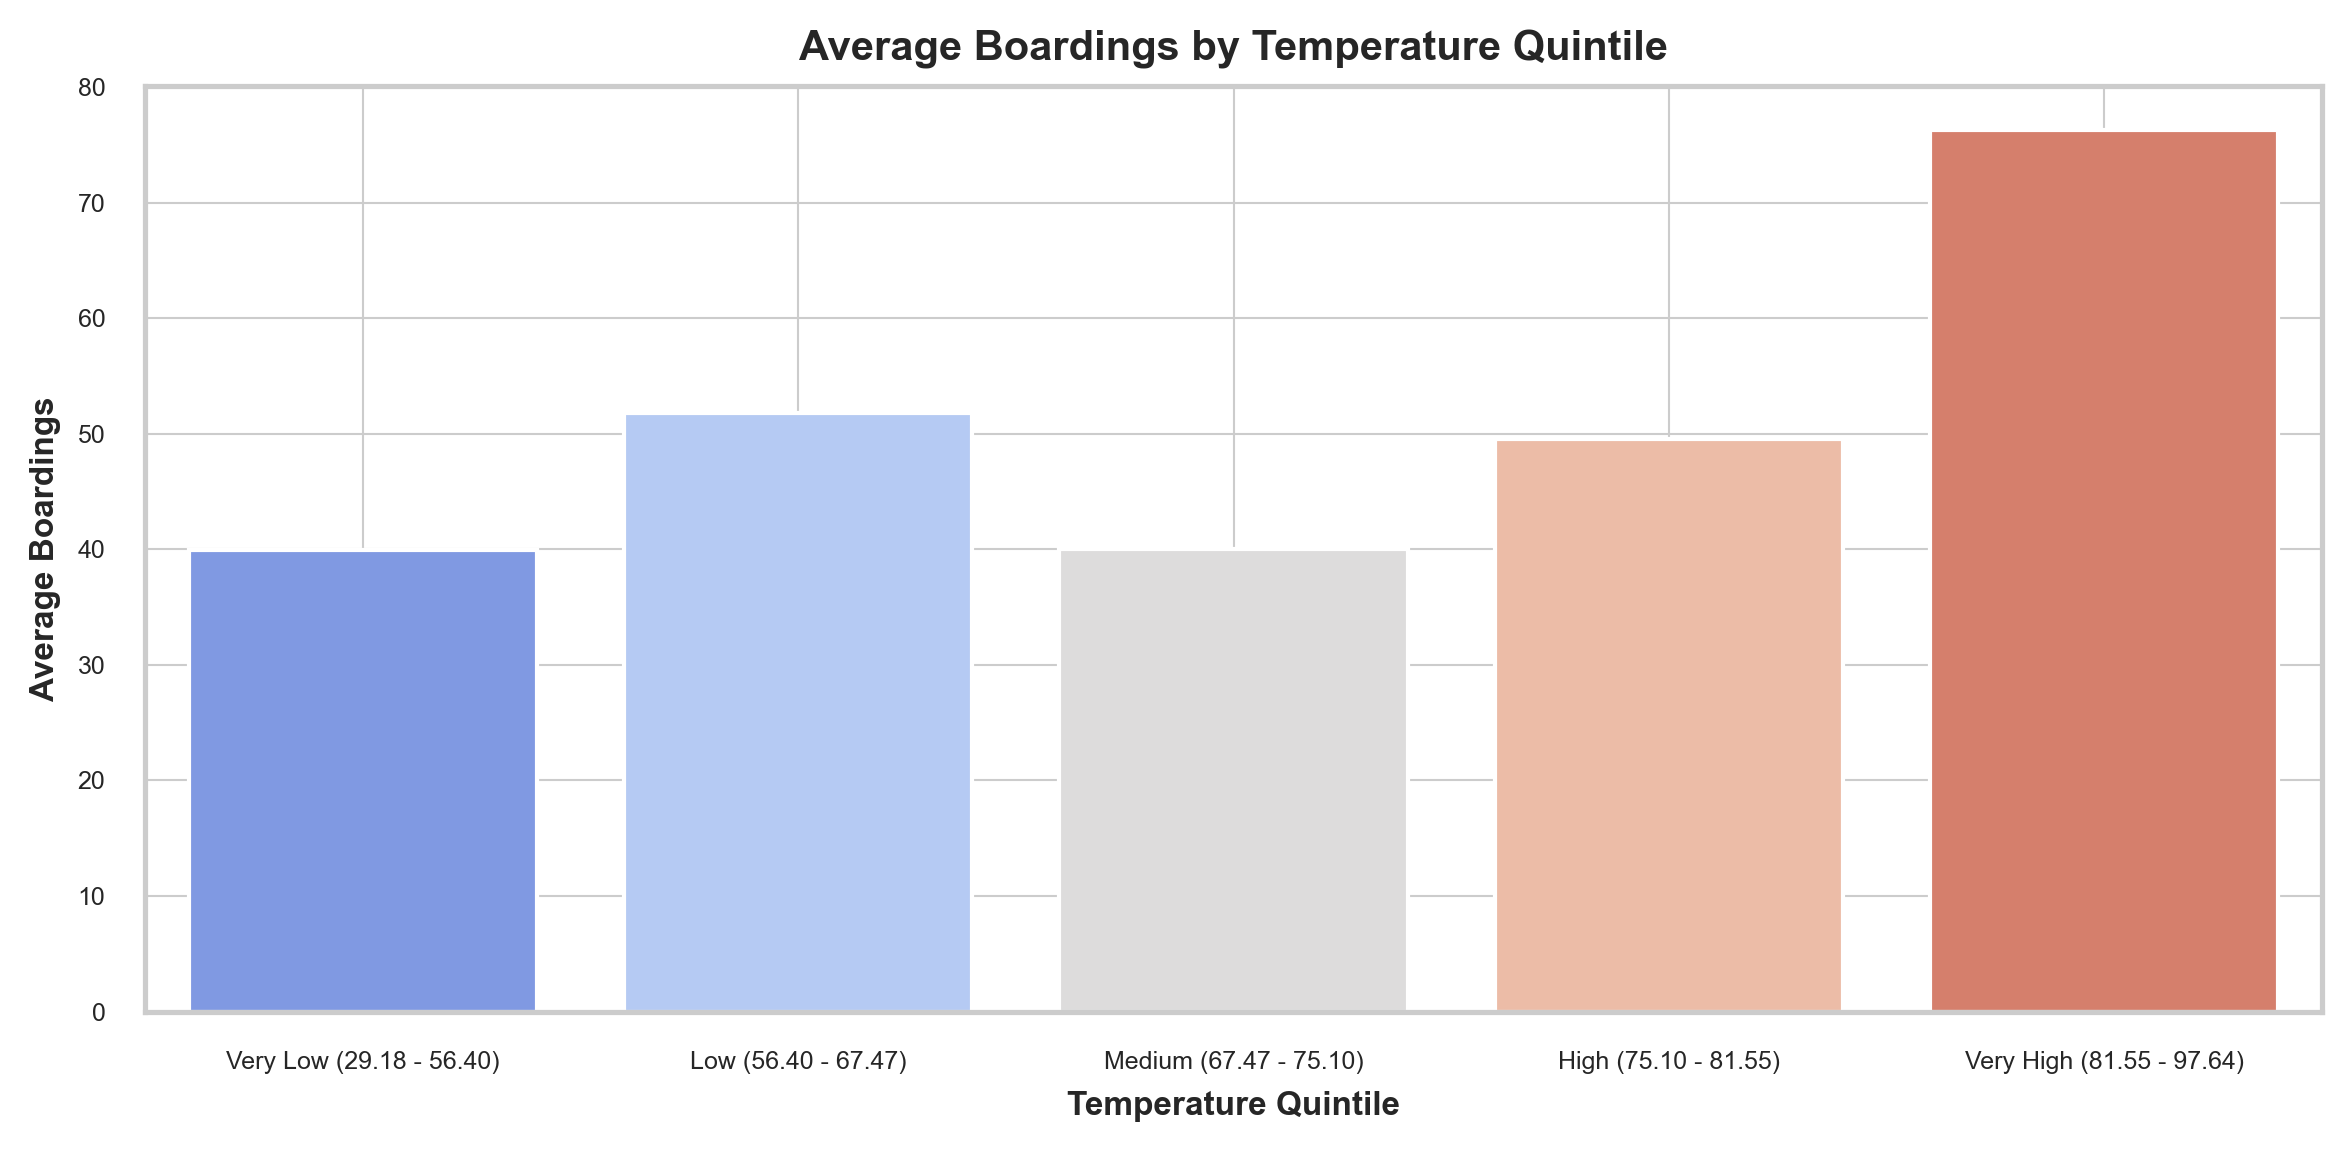

In [197]:
sns.set_style("whitegrid")

# Plotting the data
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_boardings_by_temp_labels.index, y=avg_boardings_by_temp_labels.values, palette="coolwarm")

# Title and labels
plt.title('Average Boardings by Temperature Quintile', fontsize=10, fontweight='bold')
plt.xlabel('Temperature Quintile', fontsize=8, fontweight='bold')
plt.ylabel('Average Boardings', fontsize=8, fontweight='bold')

# Adjustments
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid(linewidth=0.5)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

Data suggests that average boardings of CapMetro buses are the highest on days categorized within the "Very High" temperature quintile. This could be because of several reasons; perhaps when temperature is lower, people decide to walk to their destination instead of taking the bus.

One would suppose that boardings would be higher during the very low temperature days, but maybe during those days many people stay home instead. However, the temperature range in the "Very Low" quintile is from -1.5C to 13.5C, which is not really that cold. This is because the dataset only covers September through November, and doesn't actually capture the extremely cold days. We would need to see CapMetro data from December, January and February to corroborate what this barplot suggests.